# Heart Diseases 
In this notebook we are Covering Phase3 in the DataMining course project.

## 4- Classification 

Here we're uploading the neccesary libraiees we'll need:

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

<ipython-input-2-bd29f895f9ca>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Loading the data set and sperating them into X (features) and Y (class label):

In [3]:
df = pd.read_csv('correlated_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']

Here we split the data into a training set ( to learn the model) and a test set (to check model accuracy), with 30% saved for testing.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 678
Testing set size: 291


Creating a decision tree model using the entropy method to decide splits and train them with the training data.

In [5]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Calculating the accuracy of the entropy-based model:

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9896907216494846


Here we calculate the confusion matrix which shows how well the model's predictions match the actual class labels in the test data. and display the confusion matrix as a visual chart

[[135   0]
 [  3 153]]


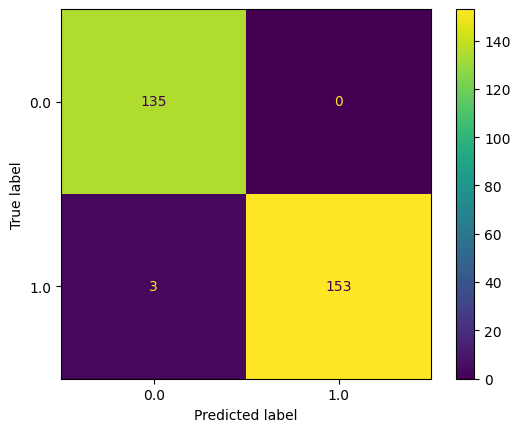

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
cn=df['target'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,display_labels=cn)

This code creates and saves a visual representation of the decision tree model, showing how it makes decisions based on features.

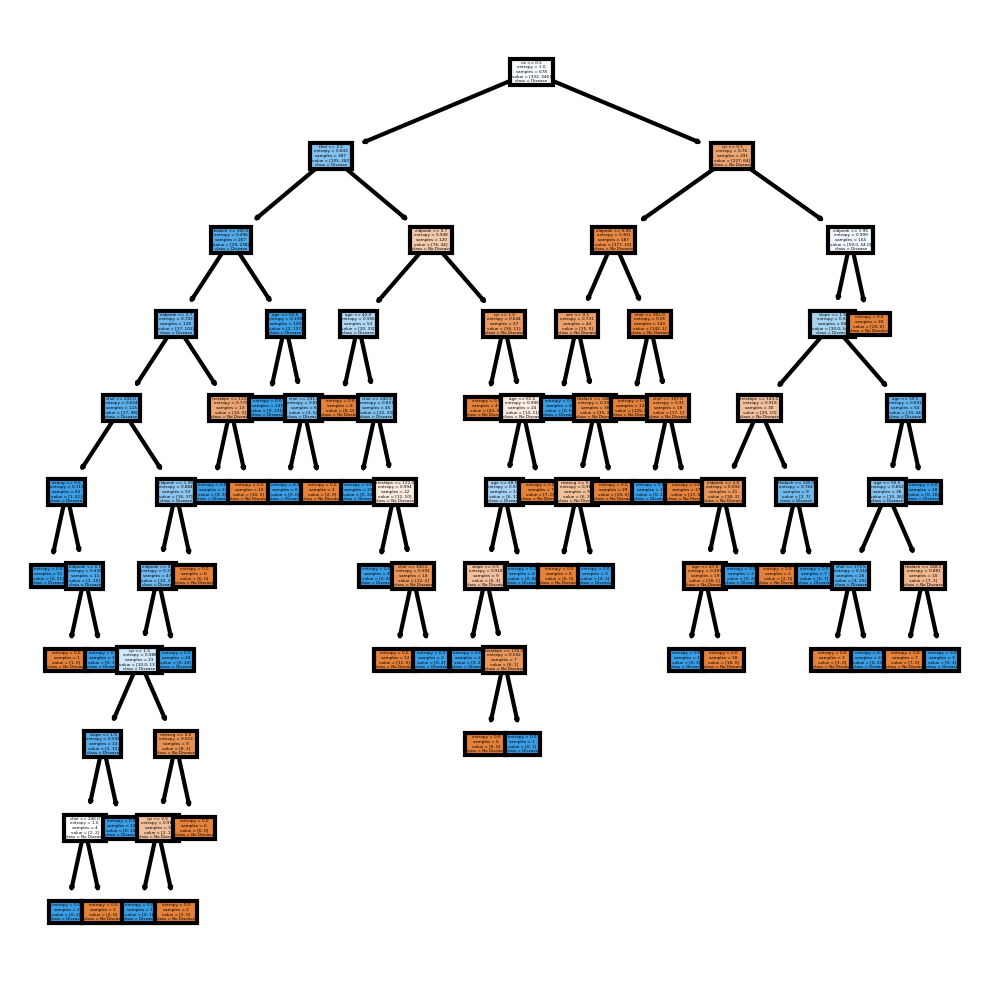

In [8]:
from sklearn import tree
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300 )
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=['No Disease', 'Disease'],
               filled=True)
fig.savefig('heart_DT.png')

Here we train a decision tree model using the Gini Index and evaluate its accuracy and display the results with a confusion matrix.

Accuracy with Gini Index: 0.9656
Confusion matrix for gini model
[[131   4]
 [  6 150]]


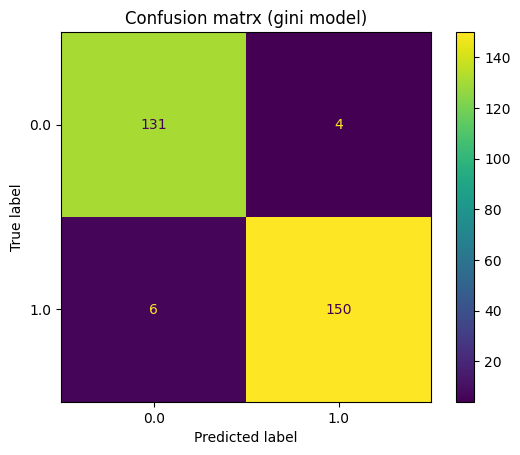

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

giniModel = DecisionTreeClassifier(criterion='gini', random_state=42)
giniModel.fit(X_train, y_train)
y_pred_gini = giniModel.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy with Gini Index: {accuracy_gini:.4f}")

cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion matrix for gini model")
print(cm_gini)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gini, display_labels=df['target'].unique())
plt.title("Confusion matrx (gini model)")
plt.show()

## 5-Clustering

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('correlated_dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       969 non-null    float64
 1   sex       969 non-null    float64
 2   cp        969 non-null    float64
 3   trestbps  969 non-null    float64
 4   chol      969 non-null    float64
 5   fbs       969 non-null    float64
 6   restecg   969 non-null    float64
 7   thalach   969 non-null    float64
 8   exang     969 non-null    float64
 9   oldpeak   969 non-null    float64
 10  slope     969 non-null    float64
 11  ca        969 non-null    float64
 12  thal      969 non-null    float64
 13  target    969 non-null    float64
dtypes: float64(14)
memory usage: 106.1 KB
None


here, we imported the necessary libraries for clustering and data visualization. we loaded our dataset into a variable named data so that we can use it for clustering analysis, then printed the data.

Step 1: K-means Algorithm

In [11]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('correlated_dataset.csv')
features = df.drop(df.columns[13], axis=1)  
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\nScaled DataFrame:")
print(scaled_df.head())



Scaled DataFrame:
        age      sex        cp  trestbps      chol       fbs   restecg  \
0 -0.266603  0.65192 -0.916593 -0.353744 -0.704253 -0.409231  0.883630   
1 -0.156344  0.65192 -0.916593  0.532139 -0.899473  2.443609 -1.006519   
2  1.718073  0.65192 -0.916593  0.827433 -1.528513 -0.409231  0.883630   
3  0.725735  0.65192 -0.916593  1.004610 -0.899473 -0.409231  0.883630   
4  0.835994 -1.53393 -0.916593  0.414021  1.074411  2.443609  0.883630   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.827816 -0.713685 -0.031656  0.989512  1.419532  1.138395  
1  0.252065  1.401179  1.891243 -2.299810 -0.733092  1.138395  
2 -1.076590  1.401179  1.433410 -2.299810 -0.733092  1.138395  
3  0.517796 -0.713685 -0.947322  0.989512  0.343220  1.138395  
4 -1.918072 -0.713685  0.792443 -0.655149  2.495844 -0.548310  


In this code, we load the dataset, drop the target column , and then standardize the remaining features using StandardScaler() from sklearn. Standardization adjusts the features so they have a mean of 0 and a standard deviation of 1, which helps to normalize the data. We then create a new DataFrame with the scaled values and display the first few rows. 

In [12]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
df = pd.read_csv('correlated_dataset.csv')
features = df.drop(df.columns[13], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

k_values = [3, 4, 5]
results = {}

for k in k_values:
 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(scaled_df)
    
    results[f"K = {k}"] = {
        "Cluster Centers": kmeans_result.cluster_centers_,
        "Cluster Labels": kmeans_result.labels_
    }

for k, result in results.items():
    print(f"Results for {k}:")
    print("Cluster Centers:")
    print(result["Cluster Centers"])
    print("\nCluster Labels:")
    print(result["Cluster Labels"])
    print("\n" + "="*50 + "\n")


Results for K = 3:
Cluster Centers:
[[ 3.25150560e-01  1.01526301e-01  2.51504877e-01  4.09347634e-01
   3.18372201e-02  2.44360861e+00 -2.31421998e-01 -2.22687110e-02
   3.18428375e-02  1.37977726e-02 -1.10872470e-01  3.81936473e-01
  -5.07923774e-02]
 [-3.93037622e-01 -1.74547920e-01  2.15605190e-01 -1.57897608e-01
  -8.79590439e-03 -4.09230839e-01  1.33818911e-01  5.71052213e-01
  -5.21424322e-01 -5.54380380e-01  4.76405258e-01 -4.10642899e-01
  -1.92847069e-01]
 [ 4.19174224e-01  2.03378722e-01 -4.02636098e-01  5.64252059e-02
  -4.85999622e-04 -4.09230839e-01 -9.42216622e-02 -7.89866822e-01
   7.16598895e-01  7.69948594e-01 -6.21875352e-01  4.20988420e-01
   2.90167982e-01]]

Cluster Labels:
[1 0 2 1 0 2 2 2 1 2 2 0 1 2 1 1 2 1 0 2 1 2 1 1 2 1 0 0 2 2 1 2 2 1 2 2 1
 2 1 1 1 1 1 1 1 1 0 1 0 0 2 2 1 1 2 1 1 1 2 0 1 1 0 2 1 2 2 0 2 0 1 0 2 1
 1 1 1 2 1 1 0 2 2 0 1 1 2 2 0 1 1 2 1 2 1 0 1 1 1 2 1 2 1 2 1 2 0 2 0 2 2
 2 1 1 1 2 2 2 1 1 0 1 1 1 1 1 1 0 1 1 1 1 2 2 2 1 1 2 1 1 0 1 2 1 1 0

In this code, we used the K-Means clustering algorithm to group similar data points in a dataset. We first standardized the dataset's features to make them comparable, as they may have different scales. Then, we tested the algorithm with different numbers of clusters (K = 3, 4, 5) to see how the data points are grouped.

We chose these values for K to explore reasonable groupings based on the dataset size and complexity. The results show the cluster centers, which represent the "average" characteristics of each group, and the labels, which assign each data point to a cluster. These clusters help us understand patterns or similarities within the dataset.

Step 2: Clustering visualization

The average silhouette score for k=3 is: 0.16864913342960333


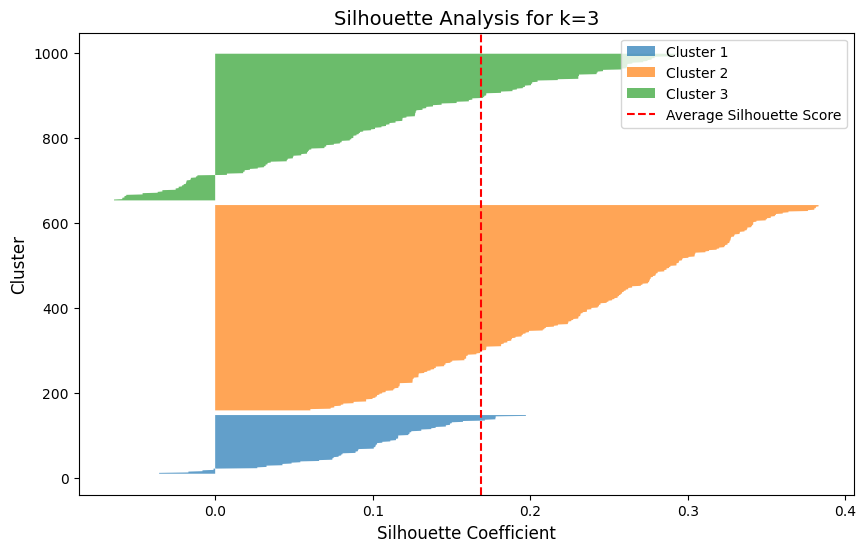

The average silhouette score for k=4 is: 0.13892771422879574


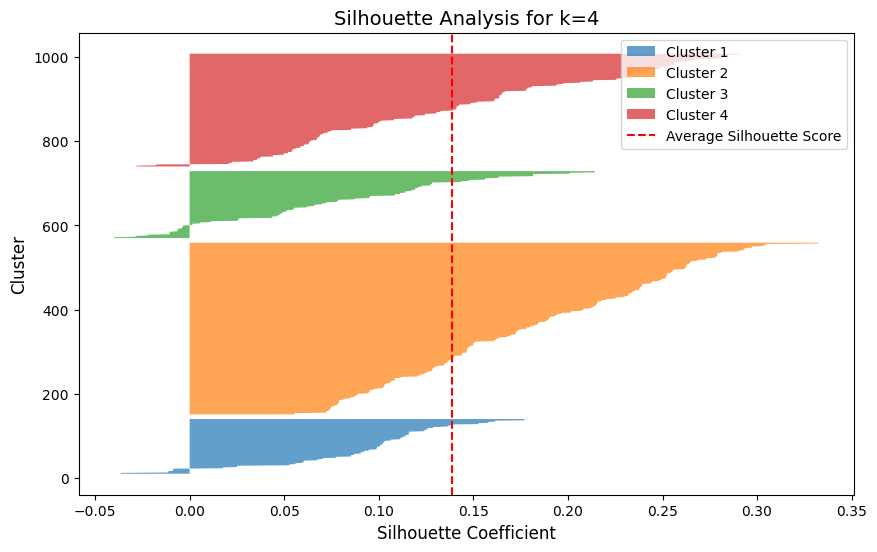

The average silhouette score for k=5 is: 0.13293885133838376


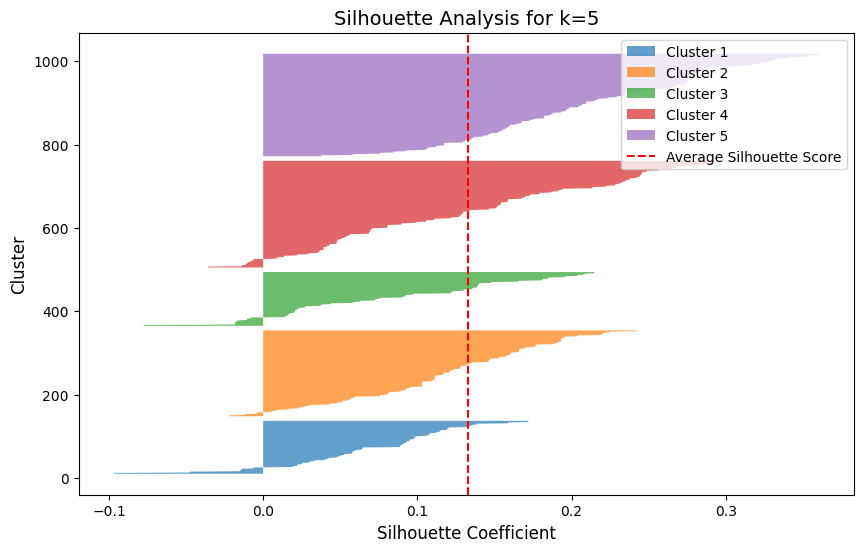

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
  
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(f"The average silhouette score for k={k} is: {silhouette_avg}")
    
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10  
    
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette plot
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
            label=f"Cluster {i + 1}"
        )
        y_lower = y_upper + 10 
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
    ax.set_title(f"Silhouette Analysis for k={k}", fontsize=14)
    ax.set_xlabel("Silhouette Coefficient", fontsize=12)
    ax.set_ylabel("Cluster", fontsize=12)
    ax.legend()
    plt.show()



Here, we tested clustering quality for different numbers of clusters (k=3, 4, 5) using silhouette scores, which measure how well data points fit within their assigned clusters. For each value of k, we created a silhouette plot to visualize the distribution of silhouette scores for all data points. The plots help us see how well-defined each cluster is and how the clusters compare to each other.
The average silhouette scores were 0.168 for k=3, 0.139 for k=4, and 0.133 for k=5. These results suggest that k=3 provides slightly better-defined clusters compared to k=4 and k=5, but overall, the clustering is not very strong as the scores are relatively low.

Silhouette Score: 0.168687311764058


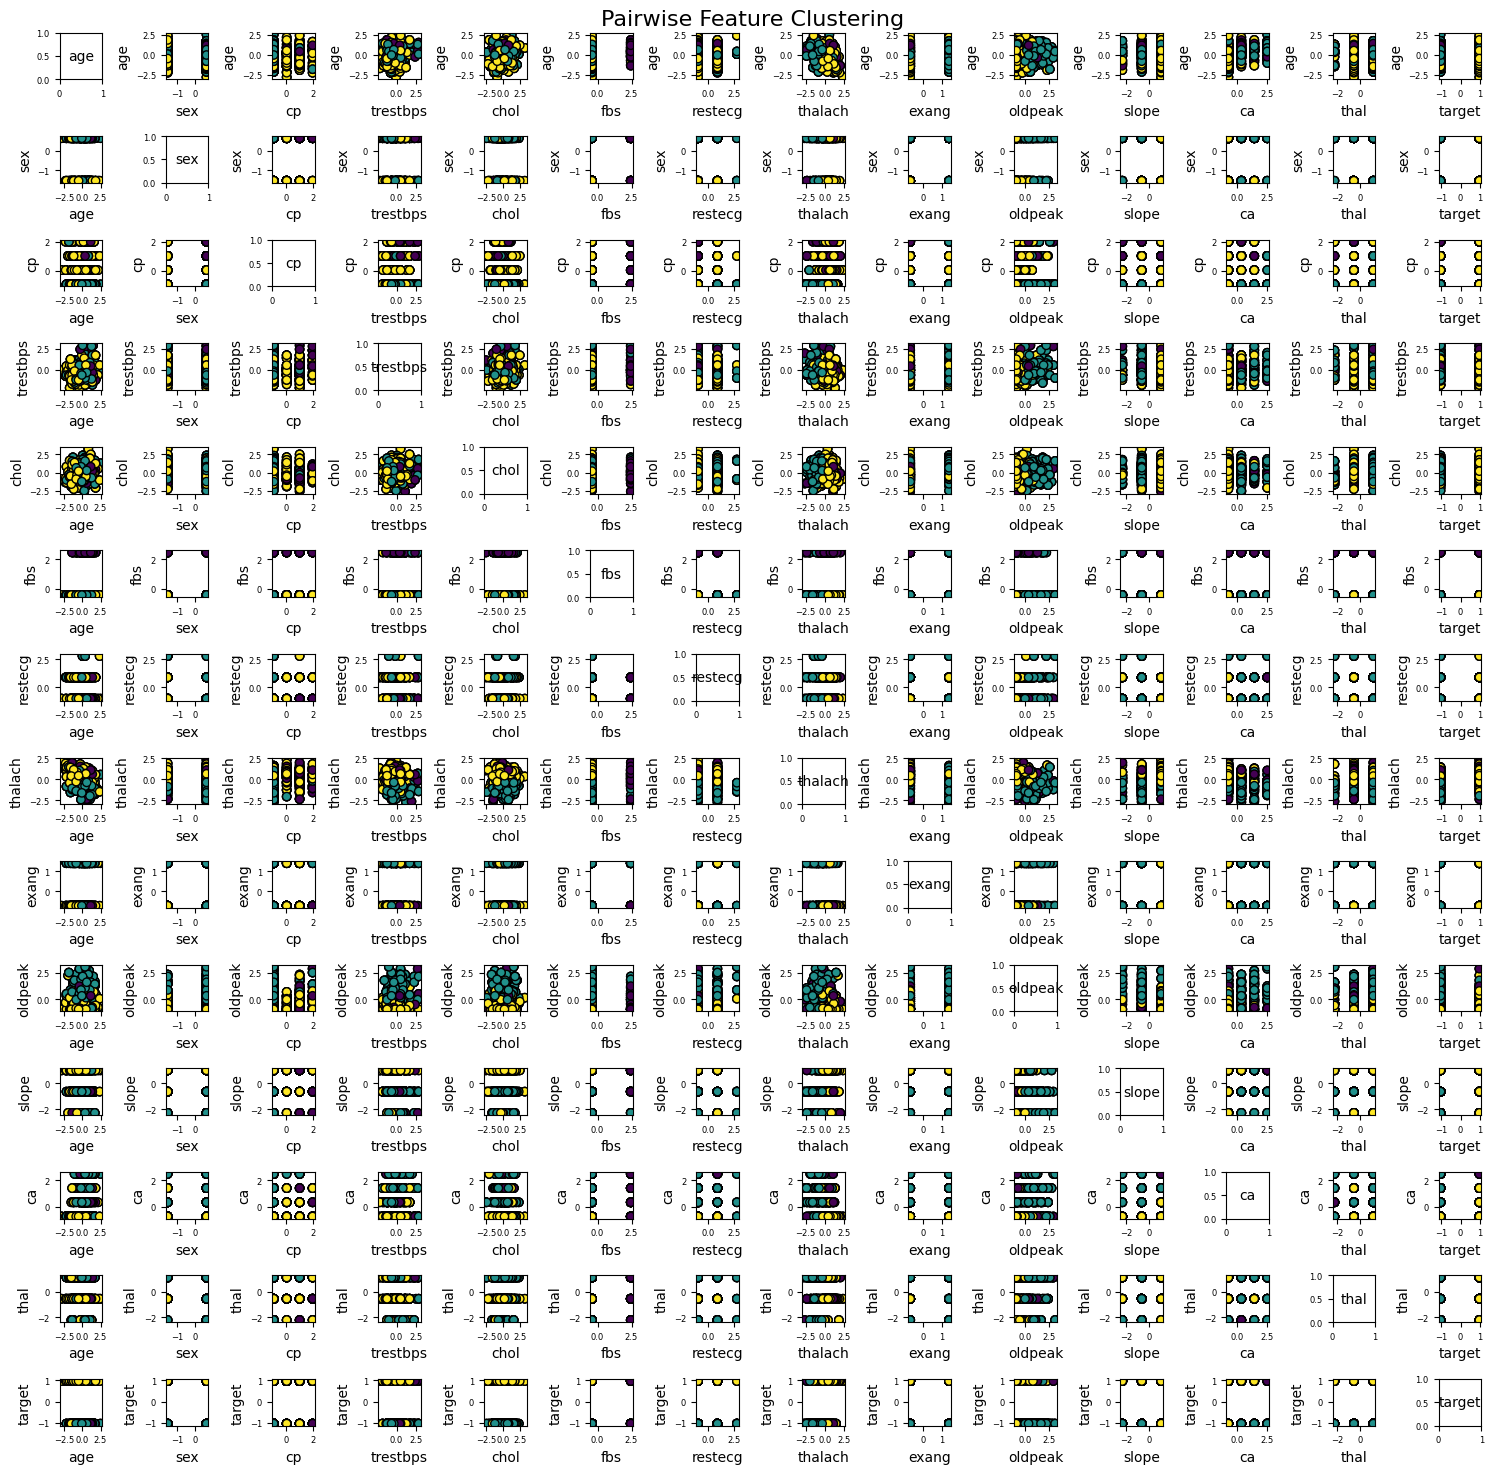

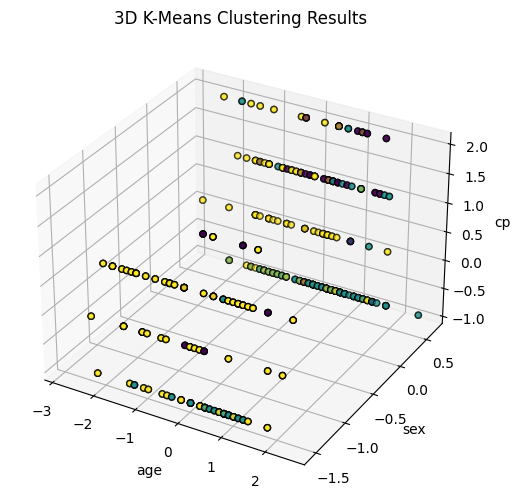

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('correlated_dataset.csv')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(scaled_features)

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

num_features = scaled_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(scaled_features[:, j], scaled_features[:, i], c=kmeans.labels_, cmap='viridis', edgecolor='k')
            axes[i, j].set_xlabel(data.columns[j])
            axes[i, j].set_ylabel(data.columns[i])
        else:
            axes[i, j].text(0.5, 0.5, data.columns[i], ha='center', va='center')
        axes[i, j].tick_params(labelsize=6)

plt.suptitle("Pairwise Feature Clustering", fontsize=16)
plt.tight_layout()
plt.show()

# 3D Plot for the first three features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=kmeans.labels_, cmap='viridis', edgecolor='k')
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.set_zlabel(data.columns[2])
plt.title("3D K-Means Clustering Results")
plt.show()


In this code, we first loaded the dataset and scaled the features so that they are on a similar scale. 
Then, we applied k-means clustering to group the data into 3 clusters. We calculated the silhouette score, which was 0.169. We also visualized the clustering results by creating scatter plots for all pairs of features, showing how the data points are grouped. Additionally, a 3D scatter plot was created using the first three features to give a clearer view of the clustering. The silhouette score suggests that while the clustering is reasonable, the groups are not very distinct.

Step 3: k-means clustering with estimating k and 
initializations

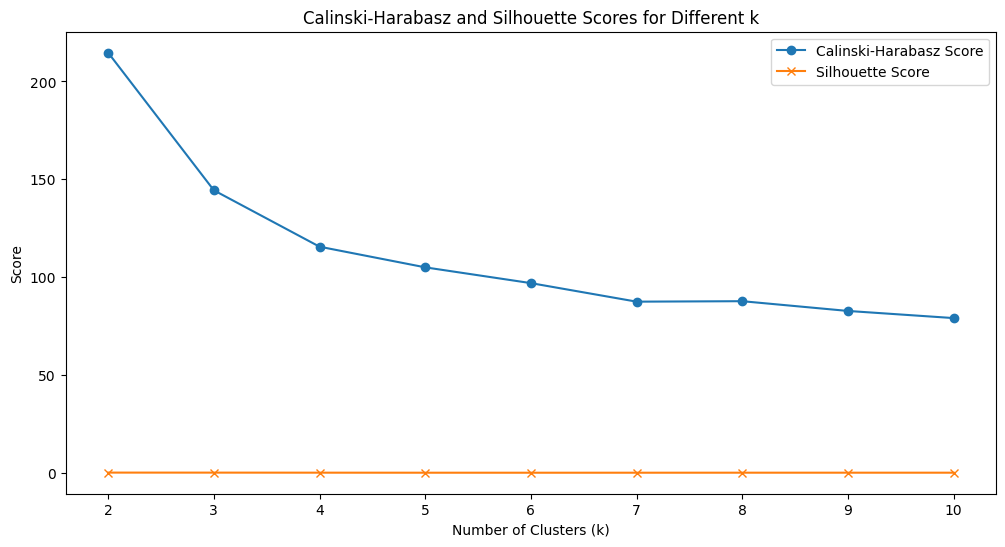

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt


df = pd.read_csv('correlated_dataset.csv')

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

k_range = range(2, 11)

# Lists to store scores
ch_scores = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)

    
    ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    

    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 6))
plt.plot(k_range, ch_scores, marker='o', label='Calinski-Harabasz Score')
plt.plot(k_range, silhouette_scores, marker='x', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Calinski-Harabasz and Silhouette Scores for Different k')
plt.legend()
plt.show()


The code analyzes clustering performance using K-means for cluster counts from 2 to 10. It standardizes the dataset and applies K-means to compute Silhouette and Calinski-Harabasz scores for each cluster count. Silhouette measures cluster separation, while Calinski-Harabasz evaluates compactness and separation. The range of 2 to 10 clusters is chosen to balance computational efficiency and meaningful evaluation, with specific focus on clusters 3, 4, and 5 as they often represent natural groupings in many datasets. The scores are stored and plotted to identify the optimal number of clusters, reflecting the dataset's inherent structure and ensuring effective clustering.

Step 4: Hierarchical Clustering

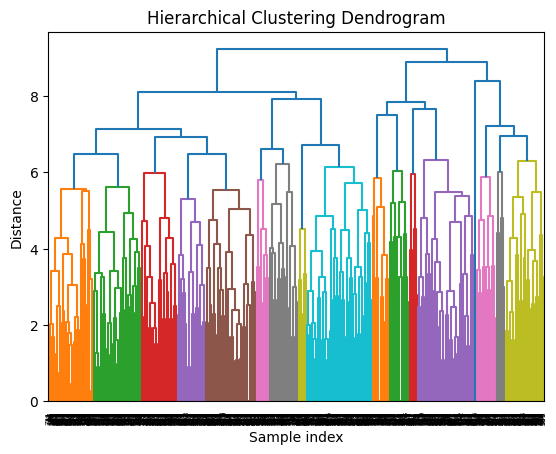

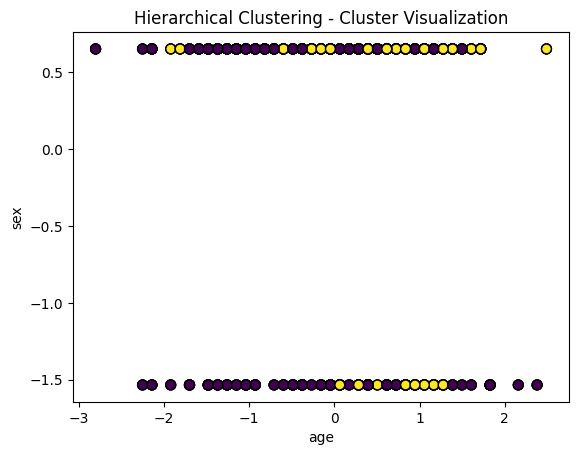

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

linkage_matrix = linkage(scaled_df, method='complete')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

num_clusters = 2
labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Hierarchical Clustering - Cluster Visualization')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()


The code performs hierarchical clustering using the complete linkage method to analyze the dataset's structure. It first standardizes the data with StandardScaler for consistent scaling, then computes a linkage matrix that measures distances between clusters. A dendrogram is generated to visually represent the hierarchical clustering process, showing how clusters are merged at different distances. The number of clusters is set to 2, and the fcluster function assigns cluster labels to each data point based on this setting. Finally, a scatter plot visualizes the clustered data, with points colored by their assigned cluster, helping interpret the relationships and groupings within the dataset.

Step 5:Cluster Validation

-Silhouette-Cluster Validation:

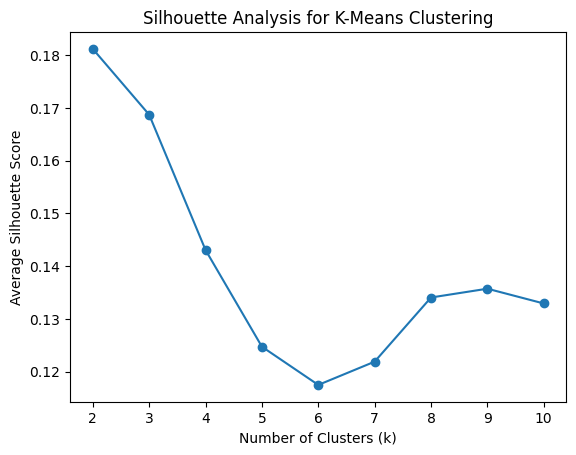

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_avg_values.append(silhouette_avg)

plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()


Based on the Silhouette Analysis K = 2 shows the highest Silhouette score, indicating that the points within the clusters are well-separated and clearly defined at this stage. The score drops significantly as the number of clusters increases, especially between K = 2 and K = 4, suggesting that the clusters become less homogeneous and more dispersed. After K = 4, the Silhouette score stabilizes around 0.12, indicating that there is no significant improvement in the quality of clusters with an increase in the number of clusters beyond this point. The optimal value of K based on the Silhouette Analysis appears to be K = 2, as it provides the highest Silhouette score. However, values of K greater than 2 lead to a significant drop in the score, meaning the clusters become less distinct and more overlapping.

-Elbow Method For Optimal k:

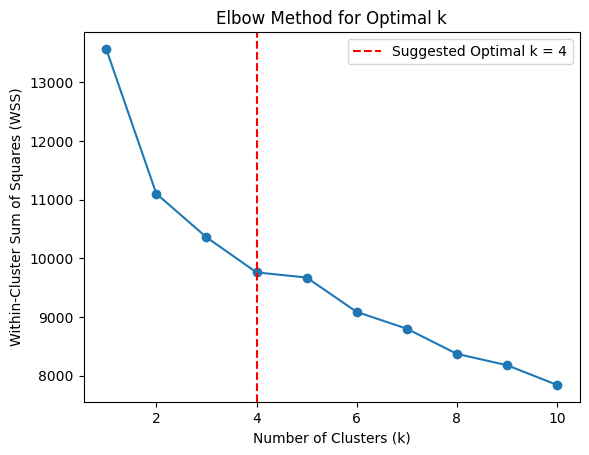

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(scaled_df)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=4, linestyle='--', color='red', label='Suggested Optimal k = 4')  # Adjust manually
plt.legend()
plt.show()


The Elbow Method plot illustrates the relationship between the number of clusters (K) and the Within-Cluster Sum of Squares (WSS). As the number of clusters increases, the WSS initially decreases significantly, indicating a substantial improvement in clustering quality. However, the rate of decrease slows down noticeably after K = 4, forming an elbow shape in the graph. This shape represents the point where further improvements in clustering quality become limited compared to the increase in the number of clusters. Based on this analysis, K = 4 is identified as the optimal number of clusters. At this point, a balance is achieved between reducing WSS and maintaining a simple clustering structure without unnecessary complexity. Increasing the number of clusters beyond K = 4 results in only marginal improvements in clustering quality, making it impractical.